# Recurrent Neural Network

## Part 1 - Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building the RNN

In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout

Using TensorFlow backend.


In [7]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0466
Epoch 2/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0041
Epoch

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 87/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0018
Epoch 88/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0016
Epoch 89/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 90/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0014
Epoch 91/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0015
Epoch 92/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 93/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0016
Epoch 94/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013
Epoch 95/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0017
Epoch 97/100
1198/1198 [==============================] - 8s 6ms/step - loss: 

## Part 3 - Making the predictions and visualising the results

In [8]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [9]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

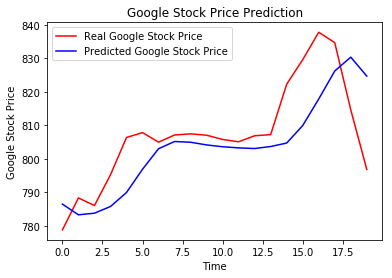

In [10]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Change to GRU

In [11]:
# Initialising the RNN
regressor_gru = Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor_gru.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor_gru.add(Dropout(0.2))

# Adding a second GRU layer and some Dropout regularisation
regressor_gru.add(GRU(units = 50, return_sequences = True))
regressor_gru.add(Dropout(0.2))

# Adding a third GRU layer and some Dropout regularisation
regressor_gru.add(GRU(units = 50, return_sequences = True))
regressor_gru.add(Dropout(0.2))

# Adding a fourth GRU layer and some Dropout regularisation
regressor_gru.add(GRU(units = 50))
regressor_gru.add(Dropout(0.2))

# Adding the output layer
regressor_gru.add(Dense(units = 1))

# Compiling the RNN
regressor_gru.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor_gru.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0506
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0040
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0040
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0039
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0034
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - l

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0013
Epoch 98/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0013
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0013
Epoch 100/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0016


## Making the predictions and visualising the results

In [12]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [13]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor_gru.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

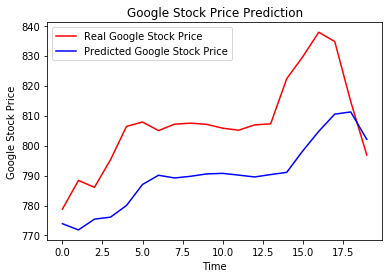

In [14]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Change to GRU and changing parameters

In [15]:
# Initialising the RNN
regressor_gru2 = Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor_gru2.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1), activation='sigmoid'))
regressor_gru2.add(Dropout(0.2))

# Adding a second GRU layer and some Dropout regularisation
regressor_gru2.add(GRU(units = 50, return_sequences = True, activation='sigmoid'))
regressor_gru2.add(Dropout(0.2))

# Adding a third GRU layer and some Dropout regularisation
regressor_gru2.add(GRU(units = 50, return_sequences = True, activation='sigmoid'))
regressor_gru2.add(Dropout(0.2))

# Adding a fourth GRU layer and some Dropout regularisation
regressor_gru2.add(GRU(units = 50, activation='sigmoid'))
regressor_gru2.add(Dropout(0.2))

# Adding the output layer
regressor_gru2.add(Dense(units = 1))

# Compiling the RNN
regressor_gru2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor_gru2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.1720
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.1314
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.1076
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0964
Epoch 5/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0916
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0906
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0883
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0839
Epoch 9/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0813
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0807
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0803
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0032
Epoch 98/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 99/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0031
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0029


## Making the predictions and visualising the results

In [16]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [17]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor_gru2.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

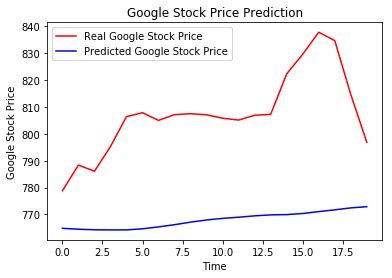

In [18]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()